In [29]:
pip install pandas statsmodels matplotlib

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



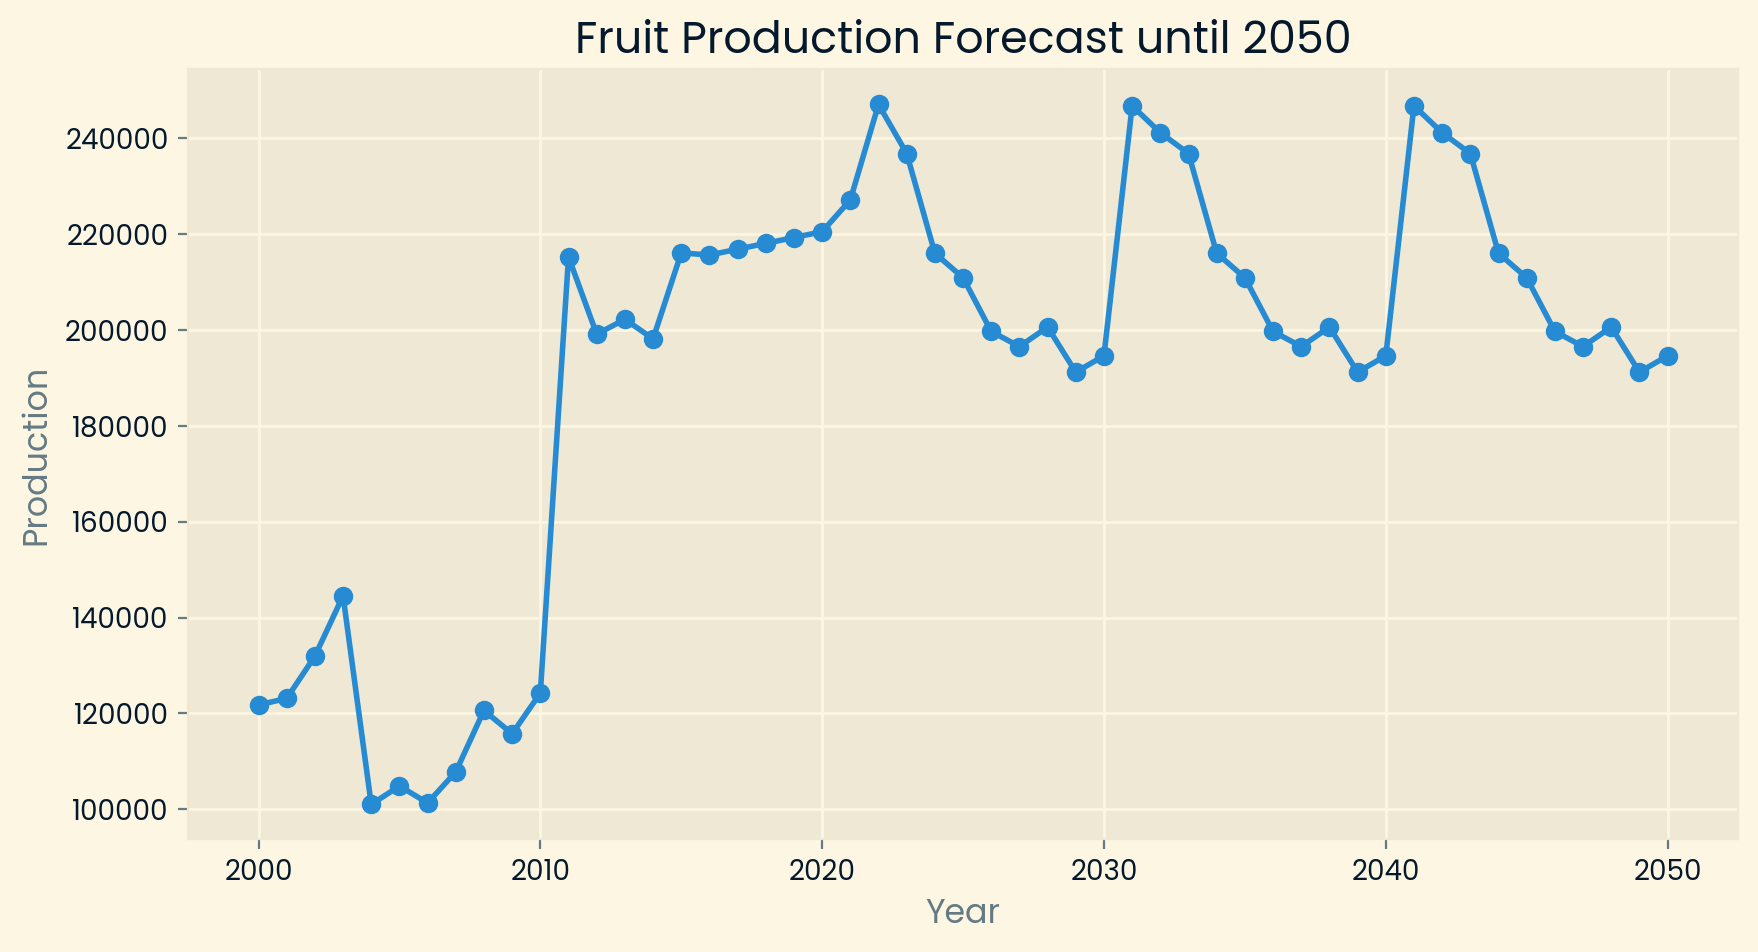

In [30]:
import pandas as pd
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import matplotlib.pyplot as plt

# Load your CSV file
df = pd.read_csv('AcaiData.csv')

# Handle missing years (2017, 2018, 2019) by interpolation or filling with a method of your choice
df = df.set_index('Year')
df = df.reindex(range(df.index.min(), df.index.max() + 1))
df['Production'] = df['Production'].interpolate()  # Simple linear interpolation

# Initialize and fit the Holt-Winters model
# Assuming an additive model; adjust seasonality to your specific data, here using a dummy seasonal period
model = ExponentialSmoothing(df['Production'], seasonal='add', seasonal_periods=10)
fit = model.fit()

# Forecasting future production up to 2050
forecast_years = np.arange(df.index.max() + 1, 2051)
forecast = fit.forecast(len(forecast_years))

# Append the forecast to the existing DataFrame
forecast_df = pd.DataFrame(forecast, index=forecast_years, columns=['Production'])
full_df = pd.concat([df, forecast_df])

# Plotting the results
plt.figure(figsize=(10, 5))
plt.plot(full_df.index, full_df['Production'], marker='o')
plt.title('Fruit Production Forecast until 2050')
plt.xlabel('Year')
plt.ylabel('Production')
plt.grid(True)
plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



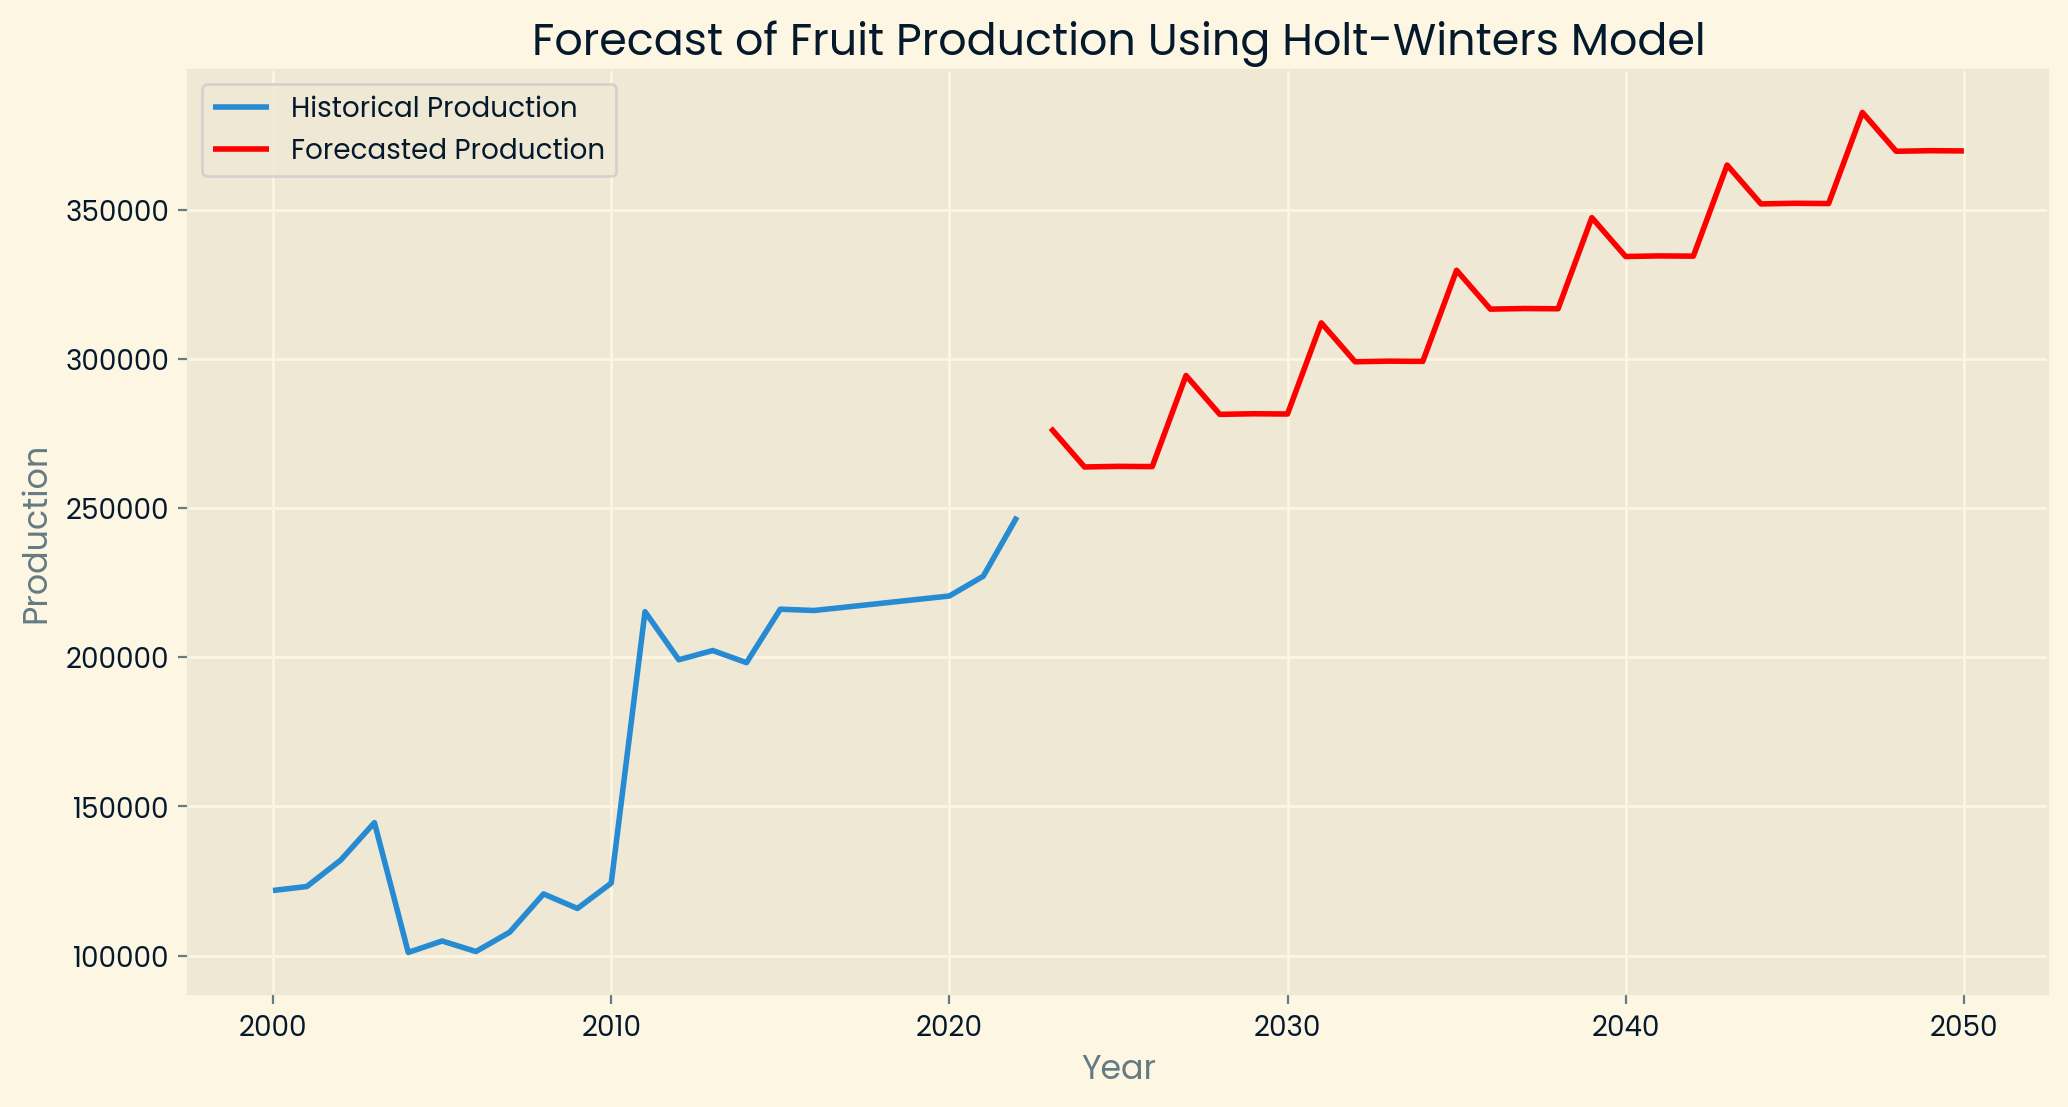

Model parameters: {'smoothing_level': 0.9596428571428571, 'smoothing_trend': 0.0001, 'smoothing_seasonal': 0.0001, 'damping_trend': nan, 'initial_level': 102284.58333333331, 'initial_trend': 4403.039393939402, 'initial_seasons': array([-1132.0859375, -5337.1328125, -9829.0546875, 16298.2734375]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [31]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import numpy as np

# Load your dataset
data = pd.read_csv('AcaiData.csv')

# Assuming 'Year' is already in the appropriate datetime format or convert it
data['Year'] = pd.to_datetime(data['Year'], format='%Y')  # Adjust the format as necessary
data = data.sort_values('Year').set_index('Year')

# Interpolate missing data if there are any gaps
data['Production'] = data['Production'].interpolate()

# Define the period of your data, you may need to adjust this
seasonal_periods = 4  # This is an example value. Set it based on your specific data

# Initialize the Holt-Winters model
model = ExponentialSmoothing(data['Production'], trend='add', seasonal='add', seasonal_periods=seasonal_periods)
fit = model.fit()

# Forecast future values - let's forecast for 28 years to reach 2050
forecast_years = len(pd.date_range(start=data.index.max(), end='2050', freq='A'))  # Annual frequency
forecast = fit.forecast(forecast_years)

# Plotting the historical data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['Production'], label='Historical Production')
plt.plot(pd.date_range(start=data.index.max(), periods=forecast_years, freq='A'), forecast, label='Forecasted Production', color='red')
plt.title('Forecast of Fruit Production Using Holt-Winters Model')
plt.xlabel('Year')
plt.ylabel('Production')
plt.legend()
plt.show()

# Print the parameters used in the model
print("Model parameters:", fit.params)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



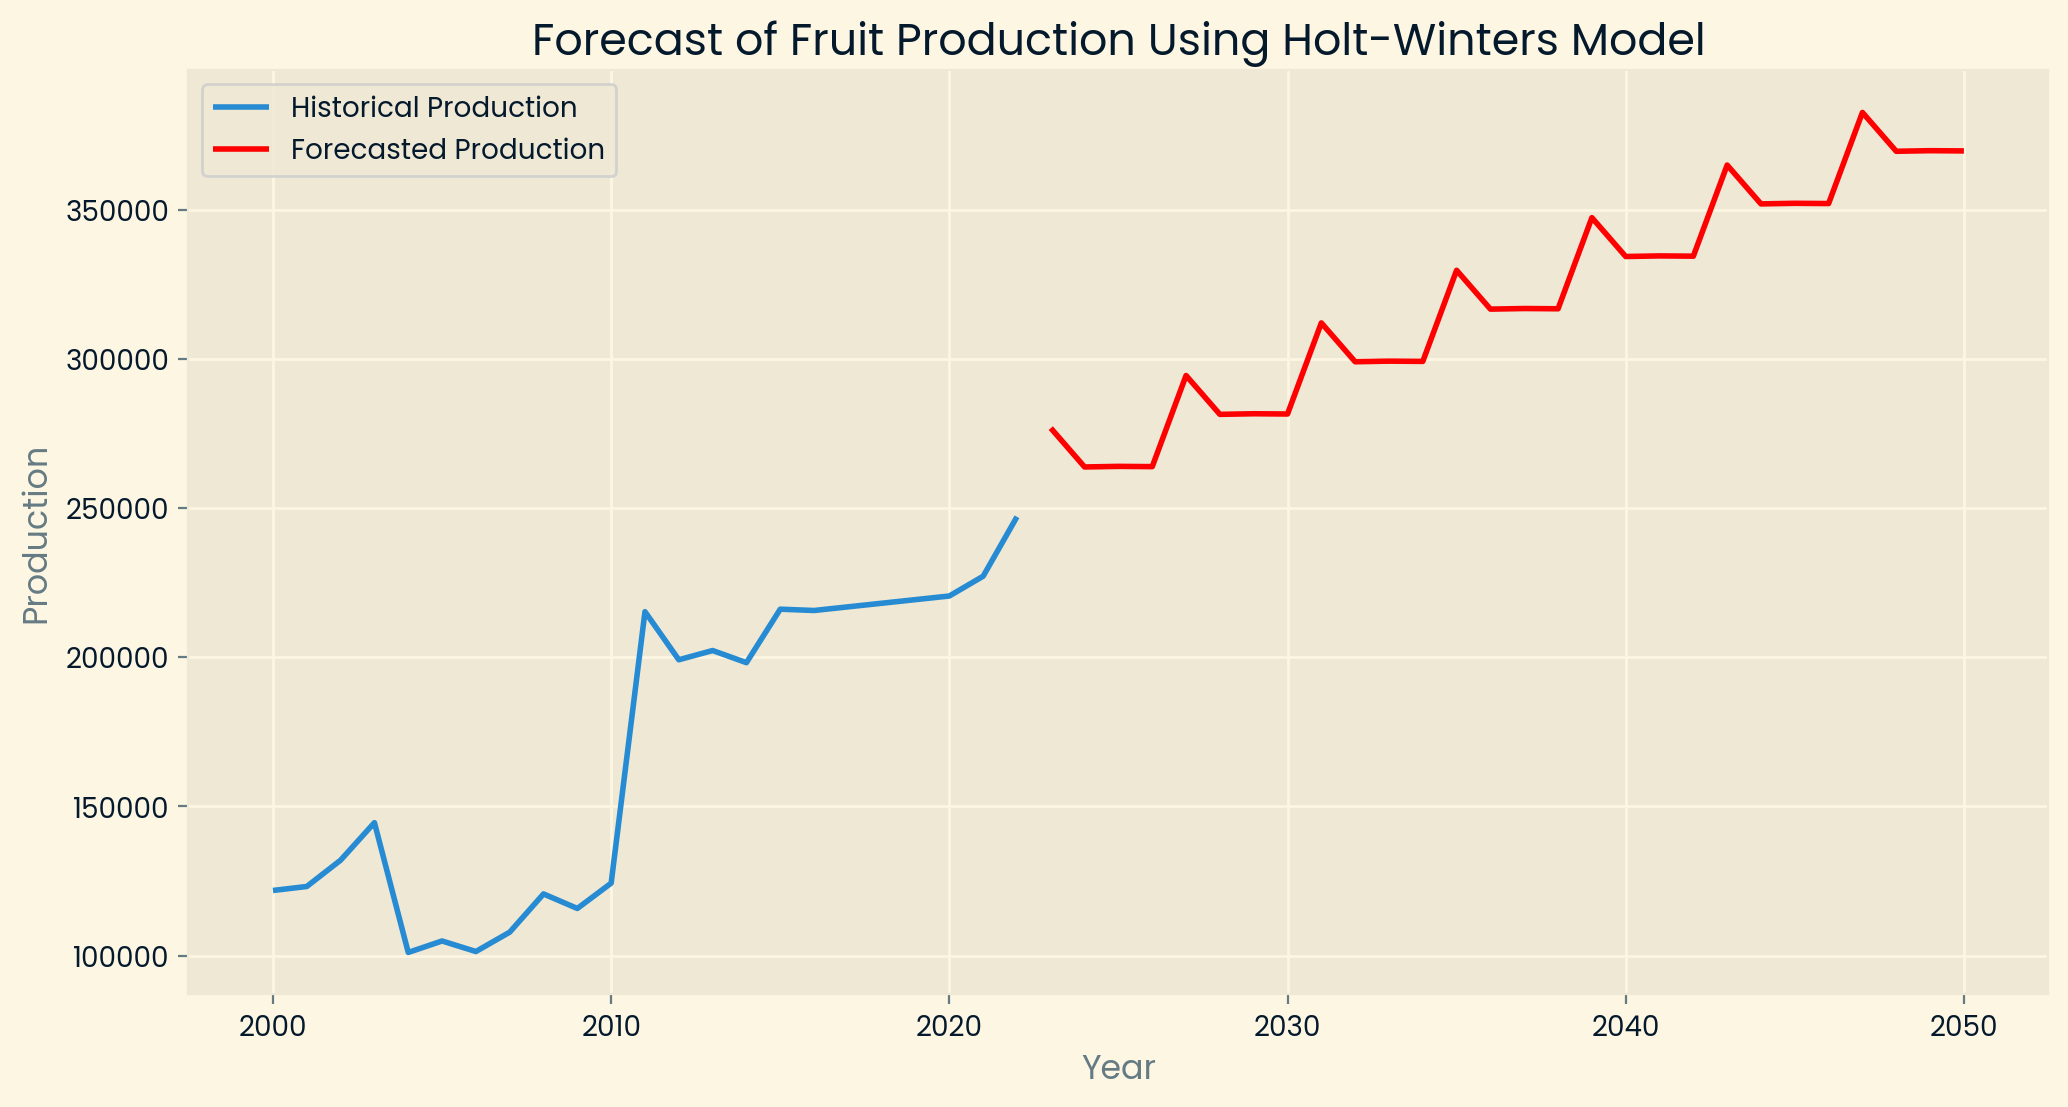

    Year  Forecasted Production
23  2023          276747.647576
24  2024          263731.316439
25  2025          263932.258561
26  2026          263848.632531
27  2027          294380.789268
28  2028          281364.458131
29  2029          281565.400253
30  2030          281481.774223
31  2031          312013.930960
32  2032          298997.599823
33  2033          299198.541945
34  2034          299114.915915
35  2035          329647.072652
36  2036          316630.741515
37  2037          316831.683637
38  2038          316748.057607
39  2039          347280.214344
40  2040          334263.883206
41  2041          334464.825329
42  2042          334381.199299
43  2043          364913.356036
44  2044          351897.024898
45  2045          352097.967021
46  2046          352014.340991
47  2047          382546.497728
48  2048          369530.166590
49  2049          369731.108713
50  2050          369647.482683
Model parameters: {'smoothing_level': 0.9596428571428571, 'smoothing_tre

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the dataset
data = pd.read_csv('AcaiData.csv')

# Convert the 'Year' column to datetime format
data['Year'] = pd.to_datetime(data['Year'], format='%Y')
data = data.sort_values('Year').set_index('Year')

# Interpolate to handle any missing values
data['Production'] = data['Production'].interpolate()

# Define the seasonal periods if known, here we assume an example value, adjust as necessary
seasonal_periods = 4

# Initialize and fit the Holt-Winters model
model = ExponentialSmoothing(data['Production'], trend='add', seasonal='add', seasonal_periods=seasonal_periods)
fit = model.fit()

# Forecast future values - let's forecast up to the year 2050
forecast_years = len(pd.date_range(start=data.index.max(), end='2050', freq='A'))
forecast = fit.forecast(forecast_years)

# Create a DataFrame for the forecasted values
forecast_index = pd.date_range(start=data.index.max() + pd.DateOffset(years=1), periods=forecast_years, freq='A')
forecast_df = pd.DataFrame(forecast.values, index=forecast_index, columns=['Forecasted Production'])

# Combine historical and forecasted data for display
combined_df = pd.concat([data, forecast_df], axis=0)

# Ensure that the index is continuous and reset index to add 'Year' column for clarity
combined_df.reset_index(inplace=True)
combined_df.rename(columns={'index': 'Year'}, inplace=True)
combined_df['Year'] = combined_df['Year'].dt.year  # Extract just the year for display

# Plotting the historical data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(combined_df['Year'], combined_df['Production'], label='Historical Production')
plt.plot(combined_df['Year'], combined_df['Forecasted Production'], label='Forecasted Production', color='red')
plt.title('Forecast of Fruit Production Using Holt-Winters Model')
plt.xlabel('Year')
plt.ylabel('Production')
plt.legend()
plt.show()

# Display the combined data as a table, showing non-NaN forecasted production values
print(combined_df[['Year', 'Forecasted Production']].dropna())

# Display model fit parameters
print("Model parameters:", fit.params)


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

No frequency information was provided, so inferred frequency YS-JAN will be used.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



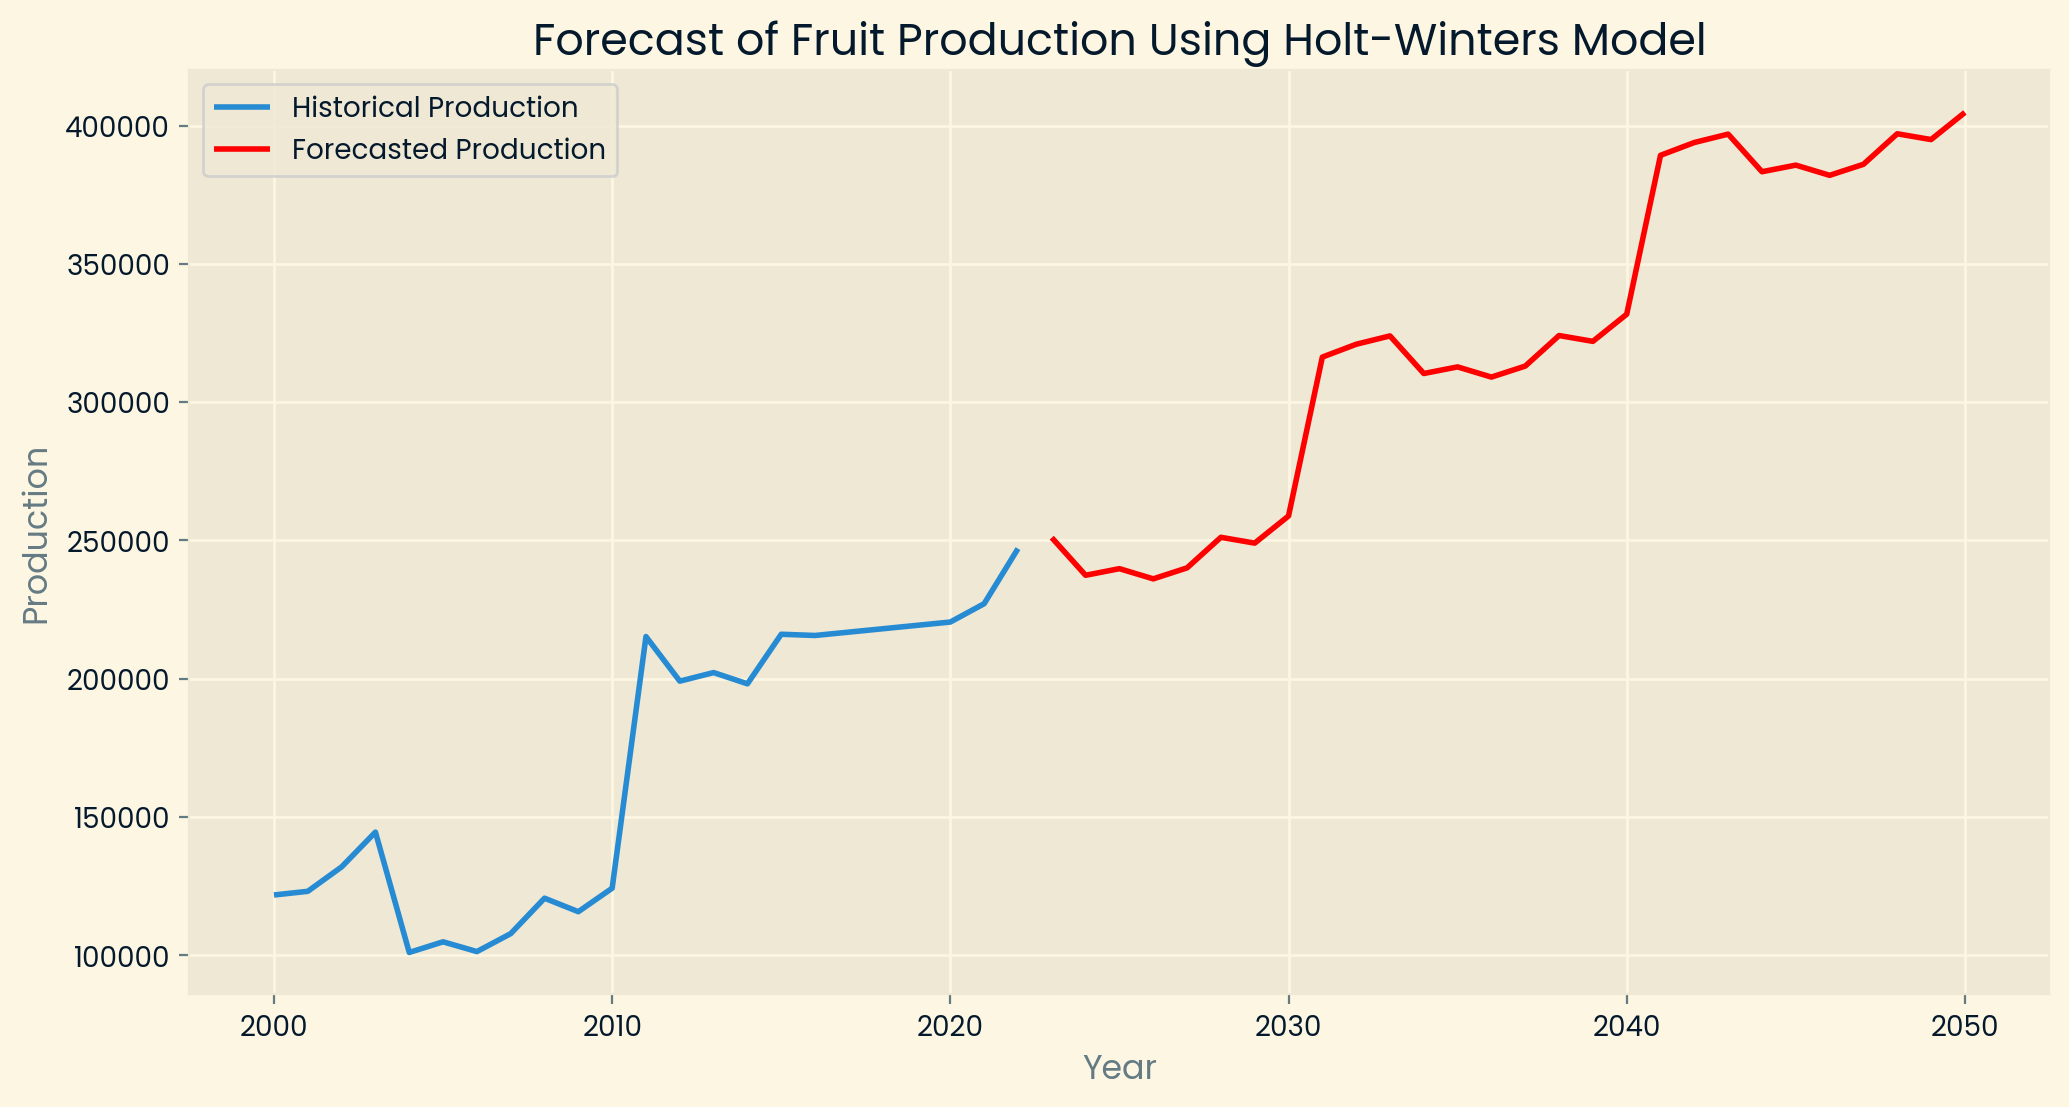

    Year  Forecasted Production
23  2023          250989.543967
24  2024          237395.630970
25  2025          239782.619784
26  2026          236096.343916
27  2027          240074.351416
28  2028          251119.366915
29  2029          249021.775496
30  2030          258829.957190
31  2031          316282.141180
32  2032          320913.656302
33  2033          323940.509067
34  2034          310346.596070
35  2035          312733.584885
36  2036          309047.309016
37  2037          313025.316516
38  2038          324070.332015
39  2039          321972.740596
40  2040          331780.922290
41  2041          389233.106280
42  2042          393864.621402
43  2043          396891.474168
44  2044          383297.561170
45  2045          385684.549985
46  2046          381998.274116
47  2047          385976.281616
48  2048          397021.297116
49  2049          394923.705696
50  2050          404731.887390
Model parameters: {'smoothing_level': 0.5353571428571429, 'smoothing_tre

In [33]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Load the dataset
data = pd.read_csv('AcaiData.csv')

# Convert the 'Year' column to datetime format
data['Year'] = pd.to_datetime(data['Year'], format='%Y')
data = data.sort_values('Year').set_index('Year')

# Interpolate to handle any missing values
data['Production'] = data['Production'].interpolate()

# Define the seasonal periods if known, here we assume an example value, adjust as necessary
seasonal_periods = 10

# Initialize and fit the Holt-Winters model
model = ExponentialSmoothing(data['Production'], trend='add', seasonal='add', seasonal_periods=seasonal_periods)
fit = model.fit()

# Forecast future values - let's forecast up to the year 2050
forecast_years = len(pd.date_range(start=data.index.max(), end='2050', freq='A'))
forecast = fit.forecast(forecast_years)

# Create a DataFrame for the forecasted values
forecast_index = pd.date_range(start=data.index.max() + pd.DateOffset(years=1), periods=forecast_years, freq='A')
forecast_df = pd.DataFrame(forecast.values, index=forecast_index, columns=['Forecasted Production'])

# Combine historical and forecasted data for display
combined_df = pd.concat([data, forecast_df], axis=0)

# Ensure that the index is continuous and reset index to add 'Year' column for clarity
combined_df.reset_index(inplace=True)
combined_df.rename(columns={'index': 'Year'}, inplace=True)
combined_df['Year'] = combined_df['Year'].dt.year  # Extract just the year for display

# Plotting the historical data and the forecast
plt.figure(figsize=(12, 6))
plt.plot(combined_df['Year'], combined_df['Production'], label='Historical Production')
plt.plot(combined_df['Year'], combined_df['Forecasted Production'], label='Forecasted Production', color='red')
plt.title('Forecast of Fruit Production Using Holt-Winters Model')
plt.xlabel('Year')
plt.ylabel('Production')
plt.legend()
plt.show()

# Display the combined data as a table, showing non-NaN forecasted production values
print(combined_df[['Year', 'Forecasted Production']].dropna())

# Display model fit parameters
print("Model parameters:", fit.params)


In [34]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import SimpleExpSmoothing, Holt, ExponentialSmoothing
import numpy as np

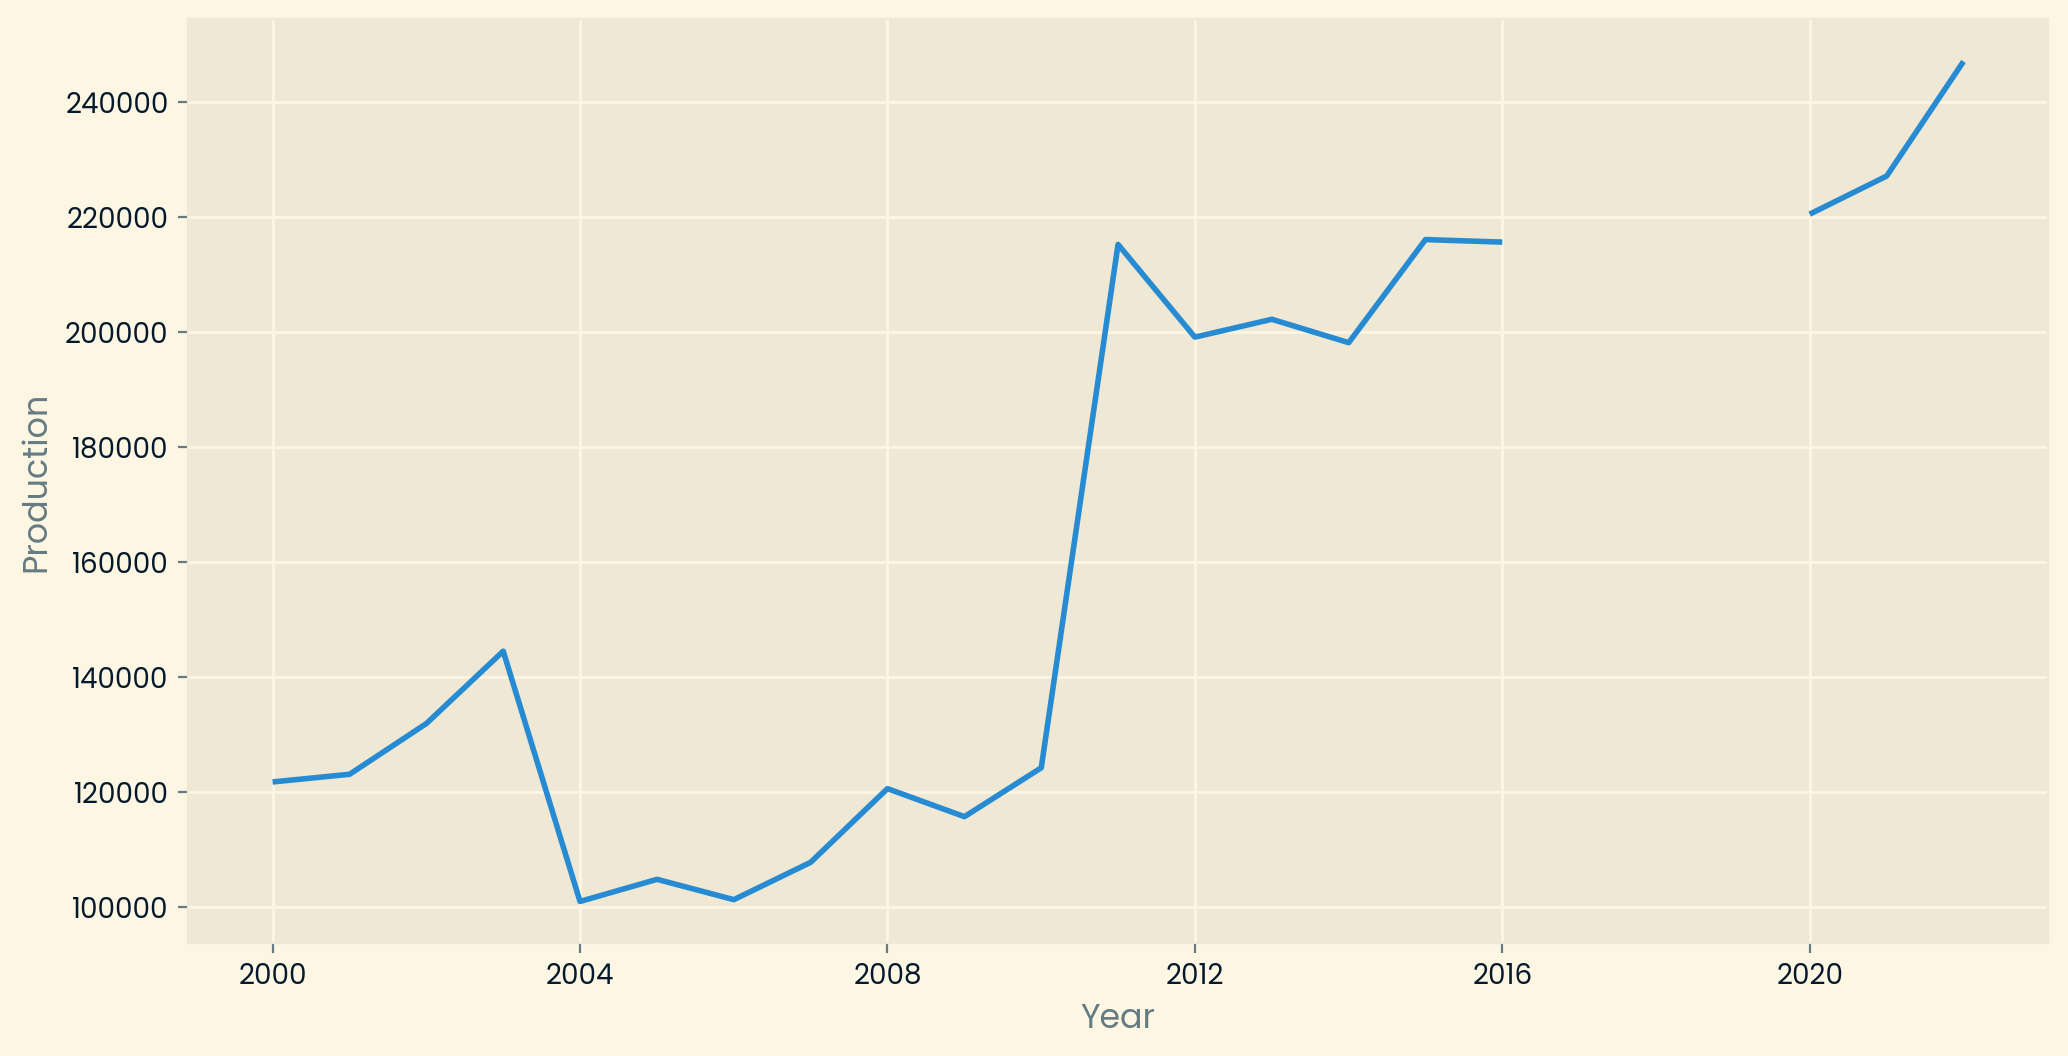

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
AcaiDataHoltWiter = pd.read_csv('AcaiData.csv')

# Convert 'Year' column to datetime
AcaiDataHoltWiter['Year'] = pd.to_datetime(AcaiDataHoltWiter['Year'], format="%Y") 

# Visualize the data
visualise_data = AcaiDataHoltWiter.set_index('Year')

fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(visualise_data.index, visualise_data['Production'])
ax.set_ylabel('Production')
ax.set_xlabel('Year')
plt.show()

Select Data for Forecast Training and Testing.
In this section, select a specific region of the data that you want to use to train the forecasting algorithms defined by train_start and train_end.

Make sure that train_end <

In [36]:
train_start = 0
train_end = 22

Select Forecasting Technique
Change the forecasting method by changing the variable forcast_method to simple exponential, holt's method or holt-winters method respectively: 'simple_exp', 'holt' and 'holt_winters' Forecasting parameters:

alpha - indicates the level coefficient (must lie between 0-1)

beta - indicates the trend coefficient (must lie between 0-1)

gamma - indicates the season coefficient (must lie between 0-1)

s_periods - indicates the number of cycles observed in the training data - only applicable to seasonal data (integer that must be larger than 1)

In [37]:
forecast_method = 'holt'

alpha = 0.5
beta = 0.01
gamma = 0.01
s_periods = 4

We first extract the training and testing data.

We use data_test.iloc[train_start:train_end, :] to locate the data point based on their index number.

We utilise the index.freq to specify that our demand is aggregrated into weeks.

In [38]:
# Updated code
AcaiDataHoltWiter['Year'] = pd.to_datetime(AcaiDataHoltWiter['Year'], format="%Y")
AcaiDataHoltWiter.set_index('Year', inplace=True)
AcaiDataHoltWiter.index = pd.DatetimeIndex(AcaiDataHoltWiter.index).to_period('Y')

In [39]:
# get adequate data
test_start = train_end
test_end = 99

train = AcaiDataHoltWiter.iloc[train_start:train_end, :]
test = AcaiDataHoltWiter.iloc[test_start:test_end, :]
test.index = pd.PeriodIndex(test.index.values, freq='Y')
train.index = pd.PeriodIndex(train.index.values, freq='Y')

Now we run the models. First, we create the model using the training demand:
model = SimpleExpSmoothing(np.asarray(train['Demand']))

Then, we fit our model to the demand it is associated with, using the parameters alpha beta and gamma that we specified before:
fit1 = model.fit(smoothing_level=alpha)

Finally, we use the fitted model to predict the future demand using the testing interval specified:
pred1 = fit1.forecast(test_end-train_end)

In [40]:
# run forecasting models
if forecast_method == 'simple_exp':
    model = SimpleExpSmoothing(train['Production'])
    # train model
    fit1 = model.fit(optimized=True)
    # make prediction
    pred1 = fit1.forecast(test_end-train_end)
elif forecast_method == 'holt':
    model = Holt(train['Production'])
    fit1 = model.fit(optimized=True)
    pred1 = fit1.forecast(test_end-train_end)
elif forecast_method == 'holt_winters':
    model = ExponentialSmoothing(train['Production'], trend='add', seasonal='add', seasonal_periods=s_periods, damped=True)
    fit1 = model.fit(optimized=True, use_boxcox=False, remove_bias=False)
    pred1 = fit1.forecast(test_end-train_end)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning:

A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:836: ValueWarning:

No supported index is available. Prediction results will be given with an integer index beginning at `start`.

